In [423]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

df = pd.read_csv("../../completed/dataset_for_modeling.csv", index_col=0)

df.head()

,Brand,Location,Age,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Hyundai,Pune,4,41000.0,Diesel,Manual,First,19,1582,126.20,5,2.602690
1,Honda,Chennai,8,46000.0,Petrol,Manual,First,18,1199,88.70,5,1.704748
2,Maruti,Chennai,7,87000.0,Diesel,Manual,First,20,1248,88.76,7,1.945910
3,Audi,Coimbatore,6,40670.0,Diesel,Automatic,Second,15,1968,140.80,5,2.930660
4,Nissan,Jaipur,6,86999.0,Diesel,Manual,First,23,1461,63.10,5,1.504077


## Parte 2 - Modellazione e Predizione

Nella prima parte abbiamo conosciuto il dataset, ci abbiamo lavorato modificandolo in modo da essere più adatto per questa seconda parte.

Adesso ci occuperemo della **modellazione**, gli obiettivi sono:
- **Understanding** (Approccio Statistico): utilizzo di modelli di regressione per quantificare le relazioni tra le variabili, testare ipotesi e comprendere l'impatto dei fattori in gioco;
- **Prediction** (Approccio Machine Learning): Costruire sistemi automatici in grado di stimare valori basandosi su dati nuovi mai visti oppure classificarli con l'obiettivo di generare un valore pratico;

### 2.1 Analisi Statistica e Regressione (Understanding)

Iniziamo con l'approccio statistico, l'attenzione verrà posta sulla significatività statistica e sull'interpretazione delle varie variabili (coefficienti). Non stiamo ancora cercando di fare la "miglior predizione possibile", ma di capire come le variabili si influenzano a vicenda, per questo motivo NON è necessario dividere in train set e test set.

Iniziamo utilizzando un semplice modello di regressione lineare, in seguito passeremo all'uso di un modello di regressione polinomiale.

#### Selezione delle variabili

Come abbiamo detto in precedenza, la nostra variabile target è Price (il prezzo di vendita delle auto), quindi cercheremo di capire a fondo l'impatto che hanno le varie variabili sul nostro target. Ricordiamo che è stata èrecedentemente applicata a 'price' una trasformazione logaritmica per alcuni motivi: normalizzazione della ditribuzione, riduzione degli errori, interpretazione in variazioni percentuali.

Come detto prima, i valori dei coefficienti del modello dovranno essere interpretati in modo differente, ovvero $(exp(\beta) - 1) \cdot 100$ differenza in punti percentuale sul prezzo mantenendo le altre variabili costanti, $\beta$ coefficiente.

Aggiungeremo le variabili man mano, studiando ogni volta il modello ottenuto.

In [424]:
y_inference = df['Price']
vars_da_usare = ['Age', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power'] 
x_inference = df[vars_da_usare]

x_inference_final = sm.add_constant(x_inference)

model = sm.OLS(y_inference, x_inference_final).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     5595.
Date:                Thu, 08 Jan 2026   Prob (F-statistic):               0.00
Time:                        19:12:40   Log-Likelihood:                -1257.2
No. Observations:                5710   AIC:                             2526.
Df Residuals:                    5704   BIC:                             2566.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.2970      0.03

Abbiamo applicato un modello di Regressione ai nostri dati, abbiamo utilizzato il metodo dell'Ordinary Least Squares (OLS), analizziamo cosa abbiamo ottenuto.

**1. Interpretazione dei coefficienti**
- **Age (-0.1128)**: Questa è la variabile più influente. Se l'età incrementa di un unità il prezzo dell'auto subisce una diminuzione di circa **11,28%**.
- **Power (0.0081)**: Per ogni unità di potenza (bhp) in più, si ha un incremento dello **0,81%** del prezzo, sembra poco ma su tanti cavalli inizi a diventare un bel valore.
- **Engine (0.0003)**: Anche la cilindrata ha un impatto positivo e statisticamente significativo, anche se minore rispetto la potenza, **0,03%**.

**2. Analisi dei P-value**
- **Predittori Significativi (P < 0.05)**: '`intercetta`', '`Age`', '`Engine`', '`Power`' hanno tutti un p-value di 0.000, sono quindi predittori affidabili per il prezzo.
- **Predittori NON Significativi**: '`Kilometers_Driven`', incredibilmente i chilometri percorsi non sembrano infuenzare in modo significativo il prezzo. '`Mileage`', stesso discorso per il consumo di carburante.

**3. Goodness of Fit**
- **R-squared (0.831)**: il modello sembra solido, spiega l'**83,1%** della varianza del prezzo (del logaritmo).
- **Adj. R-squared (0.830)**: identico a R-squared, ci indica che non stiamo inserendo troppe variavili "superflue".

**Multicollinearità**

Inoltre vengono restituite due note, esse riguardano un pericolo di possibile multicollinearità, in cui più variabili potrebbero offrire la stessa informazione rendendo i risultati inconsistenti. Forse riguarda la possibilità che `Engine` e `Power` offrano la stessa informazione secondo il modello.

Andiamo a correggere il modello eliminando `Kilometers_Driven` e `Mileage`:

In [425]:
y_inference = df['Price']
vars_da_usare = ['Age', 'Engine', 'Power'] 
x_inference = df[vars_da_usare].copy()

x_inference_final = sm.add_constant(x_inference)

model = sm.OLS(y_inference, x_inference_final).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     9326.
Date:                Thu, 08 Jan 2026   Prob (F-statistic):               0.00
Time:                        19:12:40   Log-Likelihood:                -1257.9
No. Observations:                5710   AIC:                             2524.
Df Residuals:                    5706   BIC:                             2550.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2854      0.013     96.949      0.0

Adesso plottiamo i grafici dei residui:

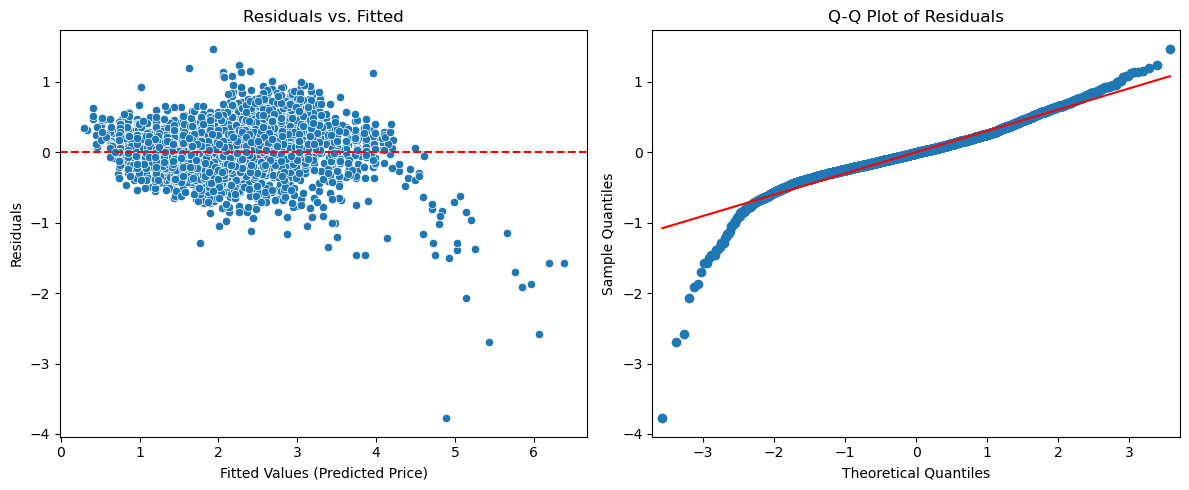

In [426]:
fitted_values = model.fittedvalues
residuals = model.resid

plt.figure(figsize=(12, 5))

# 1. Residuals vs. Fitted Plot
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(x=fitted_values, y=residuals, ax=ax1)
ax1.axhline(0, color='red', linestyle='--')
ax1.set_title('Residuals vs. Fitted')
ax1.set_xlabel('Fitted Values (Predicted Price)')
ax1.set_ylabel('Residuals')

# 2. Q-Q Plot
ax2 = plt.subplot(1, 2, 2)
sm.qqplot(residuals, line='s', ax=ax2)
ax2.set_title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()

Nel grafico dei residui notiamo che la nuvola è abbastanza concentrata verso il centro fino ad un certo punto, sulla destra i punti tendono a "cadere" verso il basso. La distribuzione non è totalmente casuale, il modello sovrastima il prezzo delle auto di fascia alta, nonostrante l'applicazione della trasformazione logaritmica sul Price. Probabile underfitting.

Nel Q-Q plot i punti tendono a seguire la linea retta ma nella cosa di sinistra si discostano, forse ci sono auto vendute prezzi diversi da quelli previsti che il modello non riesce a capire.

Adesso ricreiamo il modello applicando una **standardizzazione** alle variabili continue. Tuttavia l'interpretabilità dei coefficienti cambierà, non possiamo più capire "di quanto" cambia il valore del prezzo (ne in cifre ne in percentuali) se aumenta o diminuisce il valore di una data variabile. 

Ma adesso possiamo confrontare i coefficienti tra loro, per vedere chi ha il maggiore impatto.

Tuttavia l'interpretazione delle variabili dummie che aggiungeremo in seguito sarà sempre da considerare in termini di percentuali

In [427]:
from sklearn.preprocessing import StandardScaler

y_inference = df['Price']

vars_da_usare = ['Age', 'Engine', 'Power'] 
X_inference = df[vars_da_usare].copy()

scaler = StandardScaler()

X_scaled_array = scaler.fit_transform(X_inference)
X_inference_scaled = pd.DataFrame(X_scaled_array, columns=X_inference.columns, index=X_inference.index)

X_inference_final = sm.add_constant(X_inference_scaled)

# 4. Fit del modello OLS
model = sm.OLS(y_inference, X_inference_final).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     9326.
Date:                Thu, 08 Jan 2026   Prob (F-statistic):               0.00
Time:                        19:12:41   Log-Likelihood:                -1257.9
No. Observations:                5710   AIC:                             2524.
Df Residuals:                    5706   BIC:                             2550.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0505      0.004    513.549      0.0

R-squared non ci indica un cambiamento ma sembra essere sparito il problema di multicollinearità grave da come ci indica il **Condition Number (3.82)**.

Adesso andiamo ad aggiungere altre variabili che, come abbiamo visto precedentemente, influiscono sul prezzo. Queste che andremo ad aggiungere hanno però bisogno di essere traformate, vediamo:
- Fuel_Type: dobbiamo utilizzare la tecnica dell'one-hot-encoding, per far si che il modello possa utilizzare al meglio questa variabile per la predizione, visto che anche modificando Fuel_Type in una avriabile dummy, non essendo essa una variabile ordinale, ci sarebbero problemi.
- Transmission: stessa cosa detta per Fuel_type
- Owner_Type: essendo di per se ordinale non ci sarebbero problemi a trasformala in una semplice variabile dummy, tuttavia questo discorso vale se ipotizziamo che il cambiamento di prezzo sia lineare al passaggio tra un numero di proprietario e un altro, per questo è meglio utilizzare pure qua il one hot encoding.

In [428]:
from sklearn.preprocessing import StandardScaler

y_inference = df['Price']

vars_da_usare = ['Age', 'Engine', 'Power', 'Fuel_Type', 'Transmission', 'Owner_Type'] 
X_inference = df[vars_da_usare].copy()

X_inference = pd.get_dummies(X_inference, columns=['Fuel_Type', 'Transmission', 'Owner_Type'], drop_first=True, dtype=int)

cols_to_scale = ['Age', 'Engine', 'Power']
scaler = StandardScaler()
X_inference[cols_to_scale] = scaler.fit_transform(X_inference[cols_to_scale])

X_inference_final = sm.add_constant(X_inference)

model = sm.OLS(y_inference, X_inference_final.astype(float)).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     5260.
Date:                Thu, 08 Jan 2026   Prob (F-statistic):               0.00
Time:                        19:12:41   Log-Likelihood:                -590.88
No. Observations:                5710   AIC:                             1198.
Df Residuals:                    5702   BIC:                             1251.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.3646    

Analizziamo il risultato:

Abbiamo applicato un modello di Regressione ai nostri dati, abbiamo utilizzato il metodo dell'Ordinary Least Squares (OLS), analizziamo cosa abbiamo ottenuto.

**1. Interpretazione dei coefficienti**
- **Age (-0.3043)**: Rispetto a prima Age ha un impatto ancora più rilevante.
- **Engine (0.1136)**: Anche Engine ha aumentato il suo peso, un aumento della dimensione del motore di un unità favorisce un incremento del prezzo di **11,36%**.
- **Power (0.3678)**: Power si rivela essere il predittore più forte in termini positivi.
- **Fuel_Type_Petrol (-0.2150)**: indica che rispetto ad auto a Diesel, un auto a benzina costa circa il **21,50%** in meno.
- **Transmission_Manual (-0.2947)**: indica che rispetto alle auto Automatiche, quelle manuali costano il **30%** in meno.
-**Owner_Type (Second/Third)**: qui notiamo una svalutazione progressima, essere il secondo proprietario riduce il prezzo del **3,9%** mentre dal terzo in poi si riduce dell'**12,21%**.

**2. Analisi dei P-value**
- Tutte le variabili indipendenti hanno un impatto reale sul prezzo.

**Gooodness of Fit**
- **R-squared (0.866)**: questo valore si è alzato rispetto a prima, adesso riusciamo a spiegare circa l'**86%** della varianza nel dataset
- **Adj. R-squared (0.866)**: il valore è identico ad R-squared, non ci sono variabili inutili.


Vediamo adesso se l'aggiunta di uno tra Kilometers_Driven o Mileage o entrambi è ancora inutile oppure se è cambiato qualcosa

In [429]:
from sklearn.preprocessing import StandardScaler

y_inference = df['Price']

vars_da_usare = ['Age', 'Engine', 'Power', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Kilometers_Driven', 'Mileage'] 
X_inference = df[vars_da_usare].copy()

X_inference = pd.get_dummies(X_inference, columns=['Fuel_Type', 'Transmission', 'Owner_Type'], drop_first=True, dtype=int)

cols_to_scale = ['Age', 'Engine', 'Power', 'Kilometers_Driven', 'Mileage']
scaler = StandardScaler()
X_inference[cols_to_scale] = scaler.fit_transform(X_inference[cols_to_scale])

X_inference_final = sm.add_constant(X_inference)

model_2 = sm.OLS(y_inference, X_inference_final.astype(float)).fit()

print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     4361.
Date:                Thu, 08 Jan 2026   Prob (F-statistic):               0.00
Time:                        19:12:41   Log-Likelihood:                -431.35
No. Observations:                5710   AIC:                             882.7
Df Residuals:                    5700   BIC:                             949.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.3965    

Abbiamo aggiunto nuovamente 'Mileage' e 'Kilometers_Driven' ma a differenza di prima non c'è più il problema della multicollinearità, questo perché avendo aggiunto altri predittori, essi potrebbero aver spiegato della varianza che prima sembrava la stessa tra le prime.

Andiamo ad aggiungere la variabile 'Brand', vediamo:

In [430]:
from sklearn.preprocessing import StandardScaler

y_inference = df['Price']

vars_da_usare = ['Age', 'Engine', 'Power', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Kilometers_Driven', 'Mileage', 'Brand'] 
X_inference = df[vars_da_usare].copy()

X_inference = pd.get_dummies(X_inference, columns=['Fuel_Type', 'Transmission', 'Owner_Type', 'Brand'], drop_first=True, dtype=int)

cols_to_scale = ['Age', 'Engine', 'Power', 'Kilometers_Driven', 'Mileage']
scaler = StandardScaler()
X_inference[cols_to_scale] = scaler.fit_transform(X_inference[cols_to_scale])

X_inference_final = sm.add_constant(X_inference)

model_2 = sm.OLS(y_inference, X_inference_final.astype(float)).fit()

print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     2335.
Date:                Thu, 08 Jan 2026   Prob (F-statistic):               0.00
Time:                        19:12:41   Log-Likelihood:                 690.96
No. Observations:                5710   AIC:                            -1328.
Df Residuals:                    5683   BIC:                            -1148.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.7051    

Con l'aggiunta di Brand i nostro modello riesce a spiegare il 91% della varianza nel dataset.

#### Conclusioni

Il modello risultante sembra avere delle buone perfomance, spiega molta della varianza all'interno del dataset come si può vedere da R-squared.

I predittori più potenti sono 'Age' e 'Power', indicando come l'età dell'auto e la sua potenza "fanno" il prezzo, più l'auto è giovane e potente e mmaggiore il prezzo di vendita.

Hanno un ottimo contributo anche il tipo di carburante e il tipo di trasmissione, più precisamente se un auto è alimentata a Diesel e ha un cambio Automatico, allora il prezzo sarà più alto.

La nostra sorpresa è l'impatto poco rilevante che ha il tipo di propreitario, pensavamo che un auto che avesse avuto più di due proprietari si sarebbe svalutata molto di più, invece questa accade di più se l'auto è vecchia, indicando nuovamente l'importanda di 'Age'.

Il nostro timore sta in un possibile overfitting dato dall'uso della variabile 'Brand', noonostante la categorizzazione delle auto, ricordiamo che per questa variabile abbiamo usato la tecnica del one-hot-encoding. 

Tuttavia il modello non riesce a spiegare alcuni prezzi.


### 2.2 Analisi Predittiva e Machine Learning

Adesso l'obiettivo è creare un modello predittivo che funzioni su dati nuovi e mai visti.

Potremmo applicare questo modello in un tool per capire a quale prezzo mettere in vendita un automobile usata in una data zona geografica: l'India in questo caso.

Partiremo dal modello utilizzato per la fase di Understanding.

Una limitazione del modello attuale è la dipendenza dalla variabile 'Brand'. In fase di produzione, per gestire brand non presenti nel set di addestramento, si è prevista la strategia di raggruppamento delle classi meno frequenti in una categoria 'Other' o l'utilizzo di un encoder capace di ignorare input sconosciuti, garantendo la robustezza del sistema.

#### Un'ultima analisi multivariata

Tra poco abbiamo intenzione di creare un modello di regressione polinomiale, ma avendo applicato una trasformazione logaritmica a Price le relazioni sono cambiate.

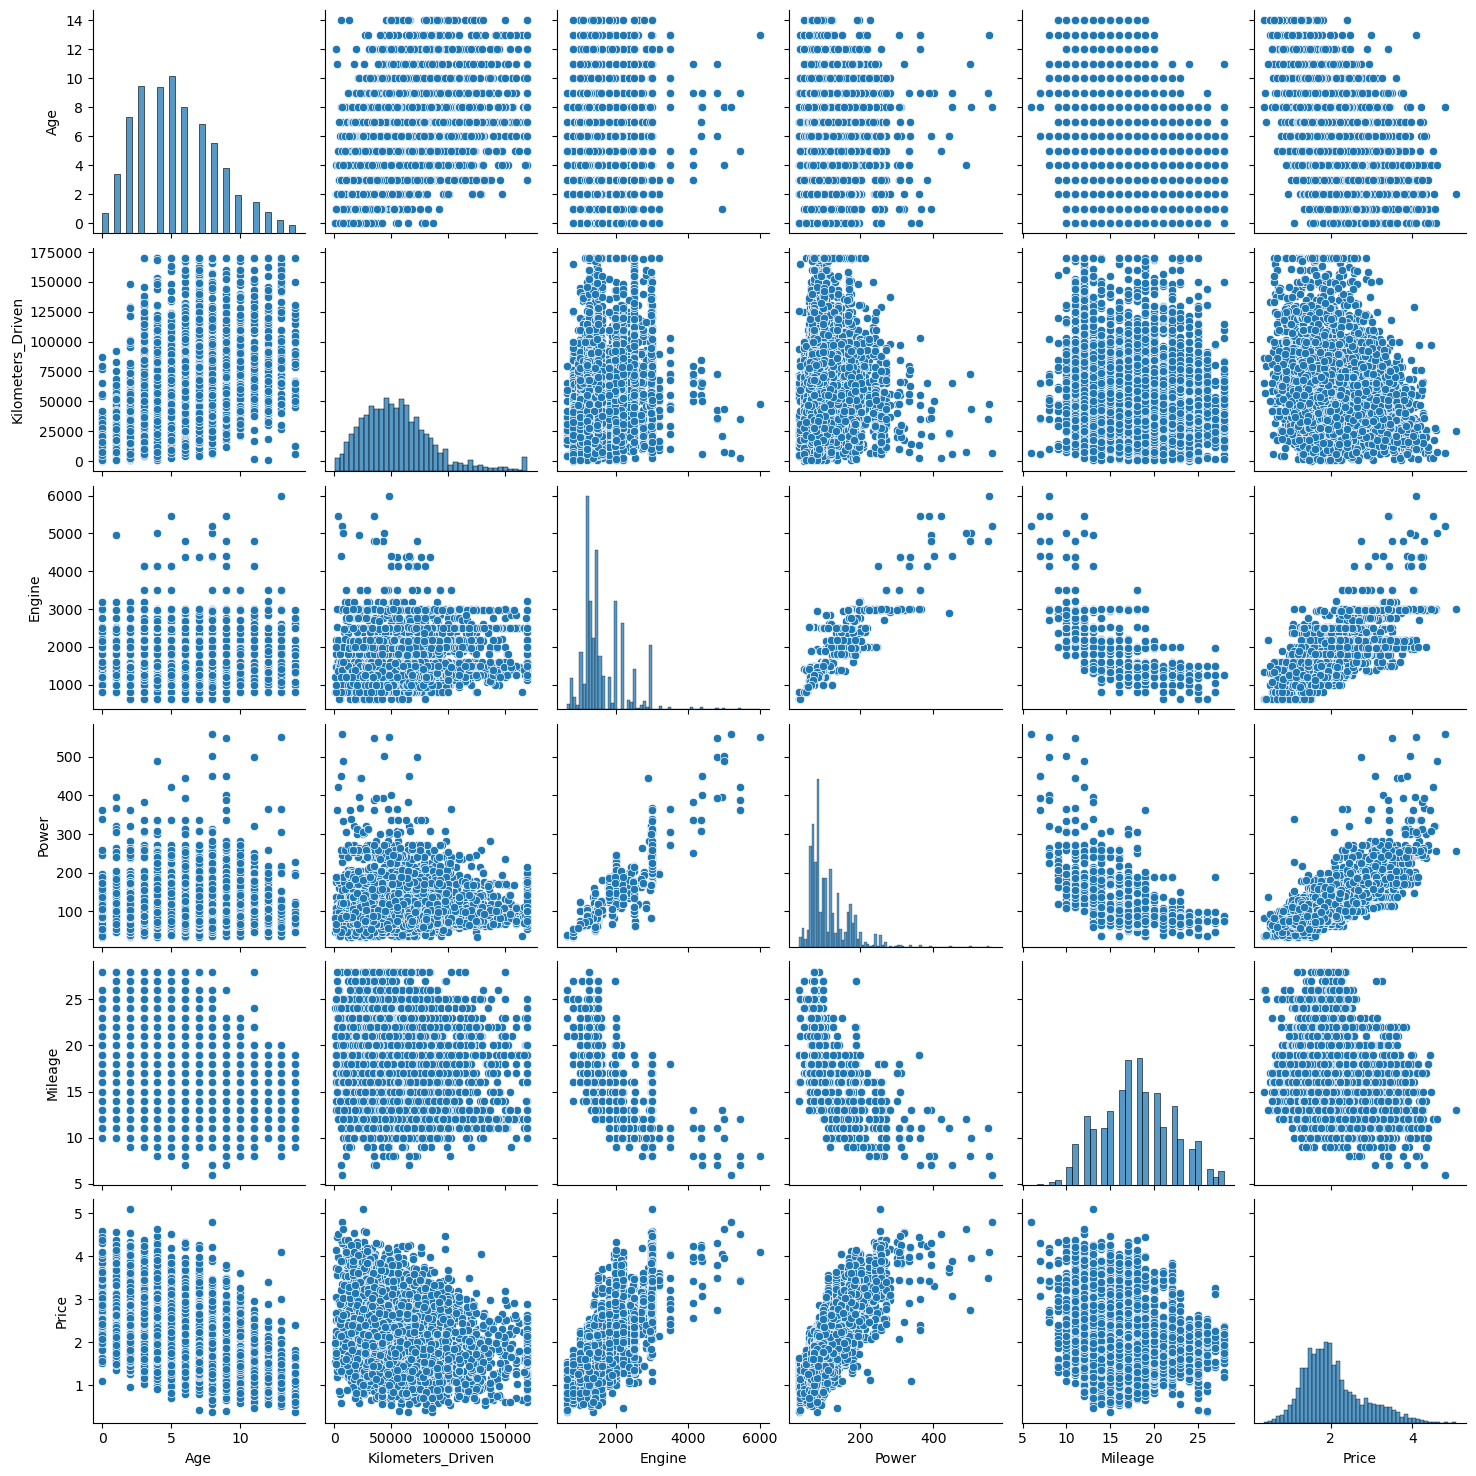

In [431]:
vars_to_check = ['Age', 'Kilometers_Driven', 'Engine', 'Power', 'Mileage', 'Price']
df_plot = df[vars_to_check].copy()

sns.pairplot(df_plot)
plt.show()


La relazione tra Power e log(Price) sembra essere quadratica, proprio come quella tra Engine e log(Price). Questo riflette il fatto che l'aumento di prezzo all'aumentare della potenza del motore non è lineare, perché forse il prezzo riflette anche altri fattori in gioco su un automobile che possiede un motore cosi preziono.

Pure la relazione tra Age e log(Price) sembra quadratica, anche se notiamo dei dati diffusi, indica che l'auto non si deprezza della stessa cifra l'anno, ma si deprezza molto nei primi anni.

Inoltre notiamo unarelazione negativa quadratica tra Mileage e Power, questo indica che auto meno potenti sono molto più efficienti di auto più potenti, che per forza consumano di più.



#### Regressione Polinomialee

Cominciamo a costruire il nostro modello di Regressione Polinomiale. Da desso non guarderemo più score come R-squared o Adj. R-squared, la nostra attenzione si focalizzerà sul punteggio ottenuto sui dati nuovi e mai visti.

Per questo motivo prima sarà necessario dividere il dataset in due parti: train_set e test_set.

In [432]:
# 1. Setup del dataset
y = df['Price']

vars_to_use = ['Age', 'Engine', 'Power', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Kilometers_Driven', 'Mileage', 'Brand'] 
X = df[vars_to_use].copy()

X = pd.get_dummies(X, columns=['Fuel_Type', 'Transmission', 'Owner_Type', 'Brand'], drop_first=True, dtype=int) 

In [433]:
from sklearn.model_selection import train_test_split

# 2. Data Splittting
val_prop = 0.2
test_prop = 0.2

# Train/Test split
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=test_prop, random_state=42)

# Train/Validation split
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=val_prop, random_state=42)

print("Sets Proportions:")
print(f"X_trainval:\t{X_trainval.shape}\t Prop: {X_trainval.shape[0]/X.shape[0]:.1f}")
print(f"X_train:\t{X_train.shape}\t Prop: {X_train.shape[0]/X.shape[0]:.1f}")
print(f"X_val:\t\t{X_val.shape}\t Prop: {X_val.shape[0]/X.shape[0]:.1f}")
print(f"X_test:\t\t{X_test.shape}\t Prop: {X_test.shape[0]/X.shape[0]:.1f}")

Sets Proportions:
X_trainval:	(4568, 26)	 Prop: 0.8
X_train:	(3654, 26)	 Prop: 0.6
X_val:		(914, 26)	 Prop: 0.2
X_test:		(1142, 26)	 Prop: 0.2


La fase di Data Normalization è importante applicarla solamente al train set per evitare il data leakage.

In [434]:
from sklearn.preprocessing import StandardScaler

# 3. Data Normalization
cols_to_scale = ['Age', 'Engine', 'Power', 'Kilometers_Driven', 'Mileage']

scaler = StandardScaler()

X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_val[cols_to_scale] = scaler.transform(X_val[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

print("Scaling applicato.")

Scaling applicato.


Adesso andiamo a crere un modello linare, in modo da poterlo confrontare con il nostro modello polinomiae futuro.

In [435]:
from sklearn.linear_model import LinearRegression

# 4. Creiamo un modello di Regressione Lineare
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# Stampiamo di coefficienti
print(linear_regressor.coef_)
print(linear_regressor.intercept_)

[-0.31265931  0.06638547  0.2374204  -0.0300803  -0.10148371 -0.28503711
 -0.09791098 -0.04260013 -0.06697509 -0.02871164 -0.79107178 -0.5671419
 -0.52744192 -0.53258683  0.24038834 -0.65453991 -0.51459244  0.00514611
 -0.58576856 -0.59128429  0.02123696 -0.58594408 -0.50258479 -0.87619786
 -0.34556292 -0.5935342 ]
2.7137914517370465


Vediamo i risultati sul validation set.

In [436]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error

# Produciamo le previsioni sul val_set
y_val_pred = linear_regressor.predict(X_val)

# 5. Metriche sul Validation Set
mae_val = mean_absolute_error(y_val, y_val_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
rmse_val = root_mean_squared_error(y_val, y_val_pred)

print("Performance sul Validation Set:")
print(f"MAE:\t{mae_val:.5f}")
print(f"MSE:\t{mse_val:.5f}")
print(f"RMSE:\t{rmse_val:.5f}")

Performance sul Validation Set:
MAE:	0.17457
MSE:	0.05086
RMSE:	0.22553


Spiegheremo in seguito i significati di questi scores, ma per adesso sappiate che sono ottimi per il modello.

Andiamo anche a vedere le performance sul Train Set per verificare se ci potrebbe essere un pericolo di overfitting.

In [437]:
# 6. Metriche sul Train Set
y_train_pred = linear_regressor.predict(X_train)

mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = root_mean_squared_error(y_train, y_train_pred)

print(f"MAE:\t{mae_train:.5f}")
print(f"MSE:\t{mse_train:.5f}")
print(f"RMSE:\t{rmse_train:.5f}")

MAE:	0.16421
MSE:	0.04643
RMSE:	0.21549


Non sembrano esserci differenze sostanziali.

Adesso andiamo a conservare i risultati sul Validation Set in modo da poterli confrontare con i modelli successivi:

In [438]:
# 7. Conserviamo i risultati
auto_usate_val_result = pd.DataFrame({
    'Method': ['Linear Regression'],
    'Parameters': [''],
    'MAE': [mae_val],
    'MSE': [mse_val],
    'RMSE': [rmse_val]
})

auto_usate_val_result

,Method,Parameters,MAE,MSE,RMSE
0,Linear Regression,,0.174574,0.050862,0.225525


#### Regressione Polinomiale

In [439]:
from sklearn.preprocessing import PolynomialFeatures

def trainval_polynomial(degree):
    cols_to_poly = ['Age', 'Engine', 'Power', 'Kilometers_Driven', 'Mileage']
    
    pf = PolynomialFeatures(degree=degree, include_bias=False)
    
    pf.fit(X_train[cols_to_poly])
    
    train_poly_raw = pf.transform(X_train[cols_to_poly])
    val_poly_raw = pf.transform(X_val[cols_to_poly])
    
    poly_cols_names = pf.get_feature_names_out(cols_to_poly)
    train_poly_df = pd.DataFrame(train_poly_raw, columns=poly_cols_names, index=X_train.index)
    val_poly_df = pd.DataFrame(val_poly_raw, columns=poly_cols_names, index=X_val.index)
    
    dummy_cols = [col for col in X_train.columns if col not in cols_to_poly]
    
    X_train_final = pd.concat([train_poly_df, X_train[dummy_cols]], axis=1)
    X_val_final = pd.concat([val_poly_df, X_val[dummy_cols]], axis=1)

    polyreg = LinearRegression()
    polyreg.fit(X_train_final, y_train)

    y_poly_train_pred = polyreg.predict(X_train_final)
    y_poly_val_pred = polyreg.predict(X_val_final)

    mae_train = mean_absolute_error(y_train, y_poly_train_pred)
    mse_train = mean_squared_error(y_train, y_poly_train_pred)
    rmse_train = np.sqrt(mse_train)

    mae_val = mean_absolute_error(y_val, y_poly_val_pred)
    mse_val = mean_squared_error(y_val, y_poly_val_pred)
    rmse_val = np.sqrt(mse_val)

    return mae_train, mse_train, rmse_train, mae_val, mse_val, rmse_val

In [440]:
for d in range(1,4):
    print("DEGREE: {} \n      {:>8s} {:>8s} {:>8s}\nTRAIN {:8.2f} {:8.2f} {:8.2f} \nVAL   {:8.2f} {:8.2f} {:8.2f}\n\n".format(d,"MAE", "MSE", "RMSE", *trainval_polynomial(d)))

DEGREE: 1 
           MAE      MSE     RMSE
TRAIN     0.16     0.05     0.22 
VAL       0.17     0.05     0.23


DEGREE: 2 
           MAE      MSE     RMSE
TRAIN     0.15     0.04     0.20 
VAL       0.16     0.04     0.20


DEGREE: 3 
           MAE      MSE     RMSE
TRAIN     0.14     0.04     0.19 
VAL       0.15     0.04     0.20




Ovviamente più aumentiamo il grado e più la curva riesce a fittare meglio i dati, notiamo che i valori diminuiscono man mano ma c'è rischio di overfitting.